# Objective

The object of this notebook is to comapre the ```supplemental_train.csv``` and ```train.csv``` and see the insights of the two sets .

# PIP

In [1]:
!pip install klib

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from klib import *
from sklearn.decomposition import PCA
%matplotlib inline

# Load Data

In [3]:
train=pd.read_csv('../input/g-research-crypto-forecasting/train.csv')
train_sup=pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv')

display(train.head(3))
display(train_sup.head(3))

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580,2399.50,2357.14,2374.590,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530,8.53,8.53,8.530,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194,14013.80,13666.11,13850.176,31.550062,13827.062093,-0.014643


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.48603,1.478,1.483681,654799.561103,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.89000,579.910,582.276667,1227.988328,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.10800,343.640,344.598000,1718.832569,344.441729,-0.004525


In [4]:
train,train_sup=train.fillna(0),train_sup.fillna(0)

In [5]:
print(train.shape)
print(train_sup.shape)

(24236806, 10)
(2015112, 10)


# PCA

In [6]:
def get_Xy(df):
    targets=np.array(df['Target'])
    df=df.drop(columns=['Target'])
    return np.array(df),targets

In [22]:
X,y=get_Xy(train)
X2,y2=get_Xy(train_sup)


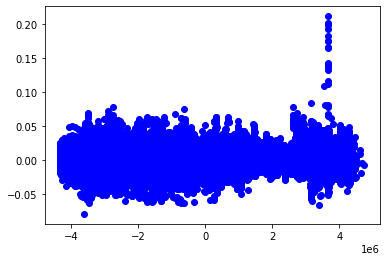

In [23]:

pca= PCA(n_components=1)
plt.scatter(pca.fit_transform(X2),y2,color='blue',label='sup')


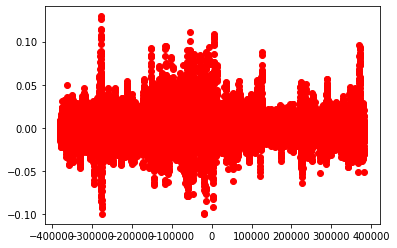

In [24]:
pca= PCA(n_components=1)
plt.scatter(pca.fit_transform(X[:100000]),y[:100000],color='red',label='train')
plt.show()

# Observations

Here we see that the relation between the input feature X and the output y ofcourse on a PCA plot because you know we live in 3D , are a bit different also a small **[Thing]** because how huge ```train.csv``` is we have picked the first 10k samples for your ez of work

# Distribution

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Target', ylabel='Density'>

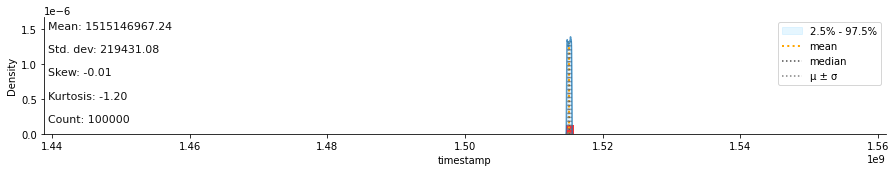

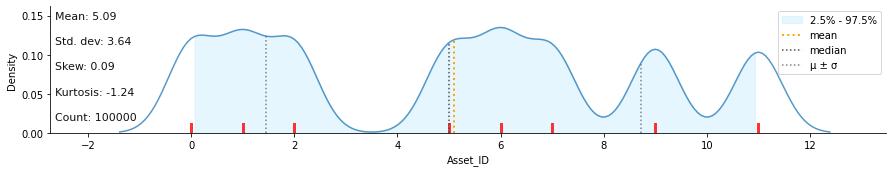

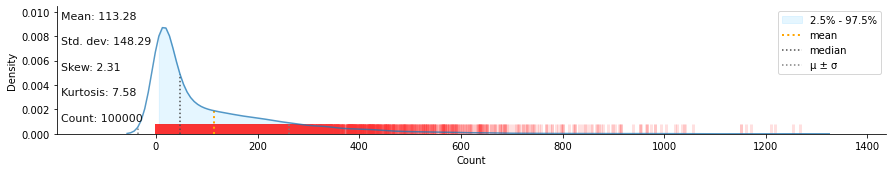

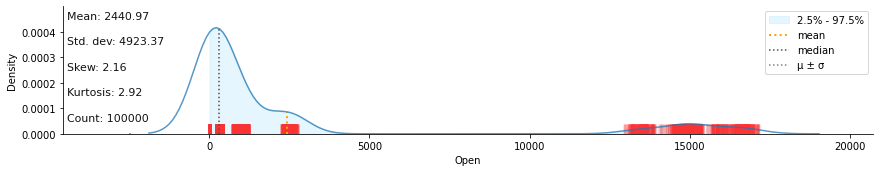

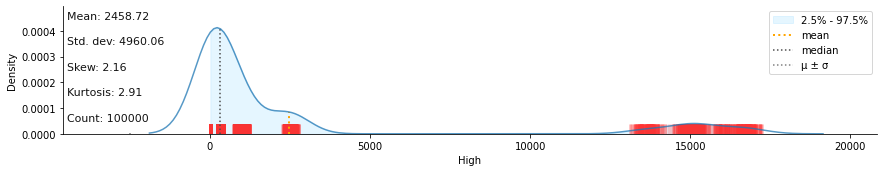

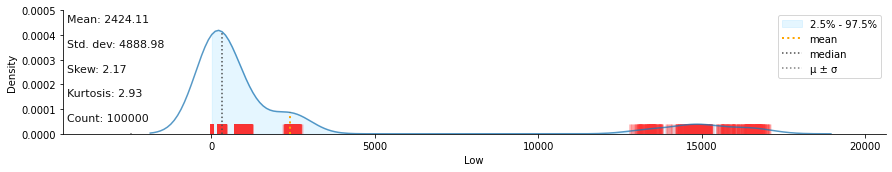

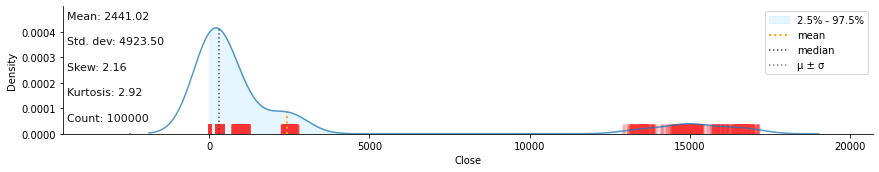

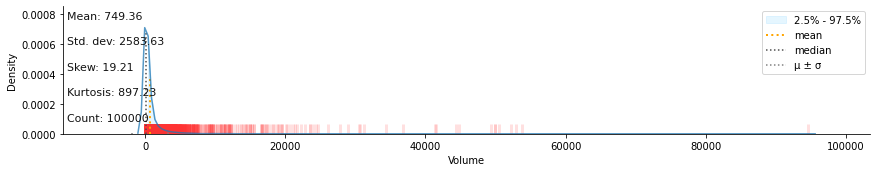

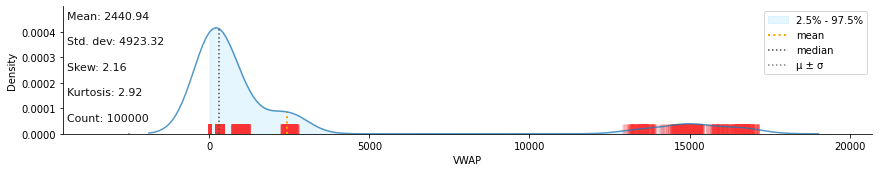

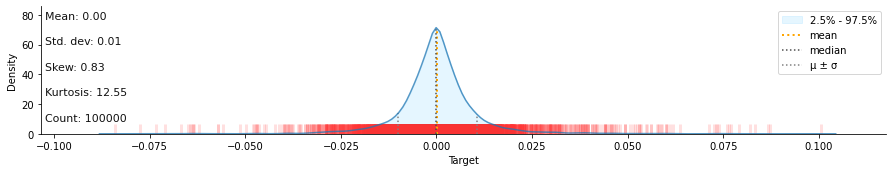

In [11]:

dist_plot(train[:100000])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Target', ylabel='Density'>

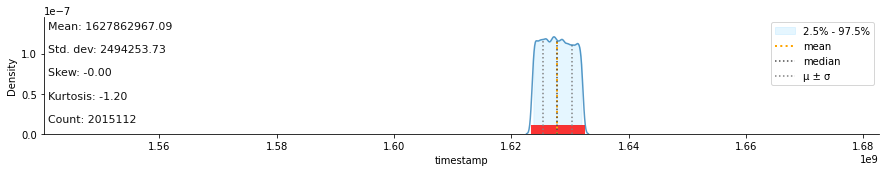

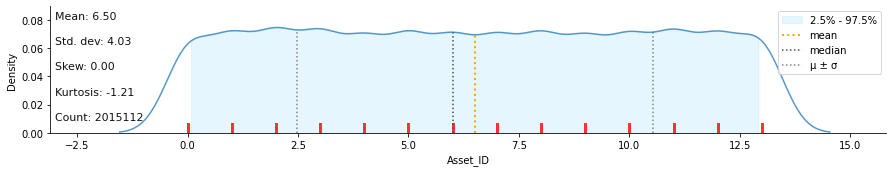

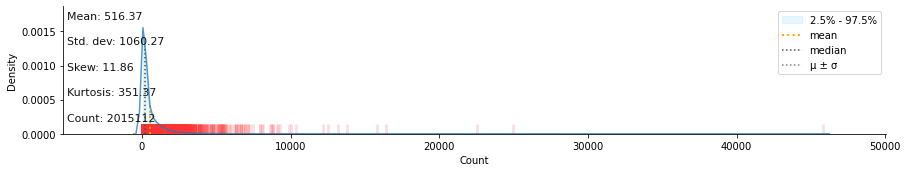

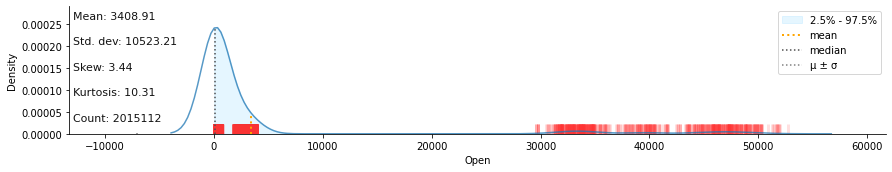

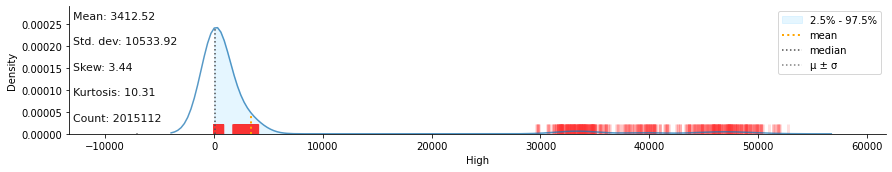

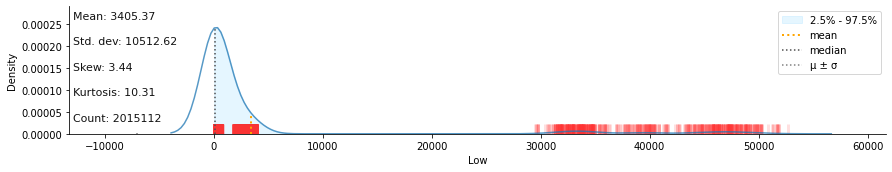

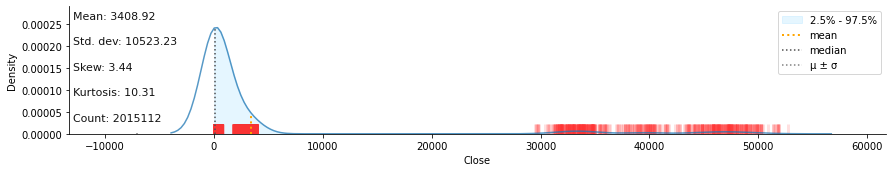

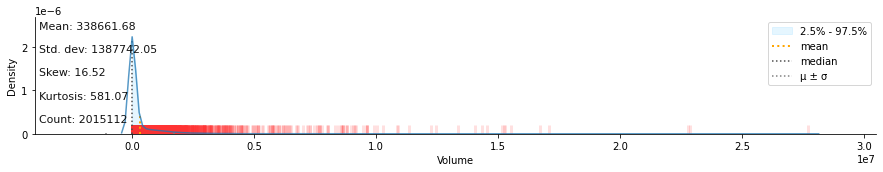

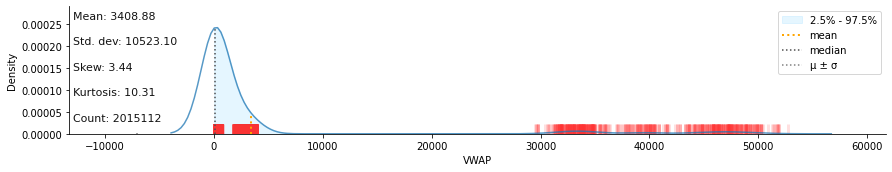

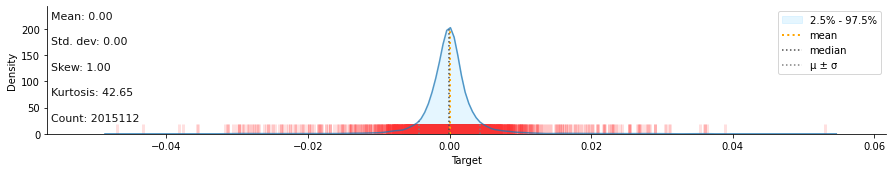

In [12]:
dist_plot(train_sup)

# Observation 2 

We see that the target value always follows a normal distribution in all cases and the other features differ a little bit 

# Correlation

**[Note]** The values are rounded of so dont think it is exactly 1.0 but is near

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

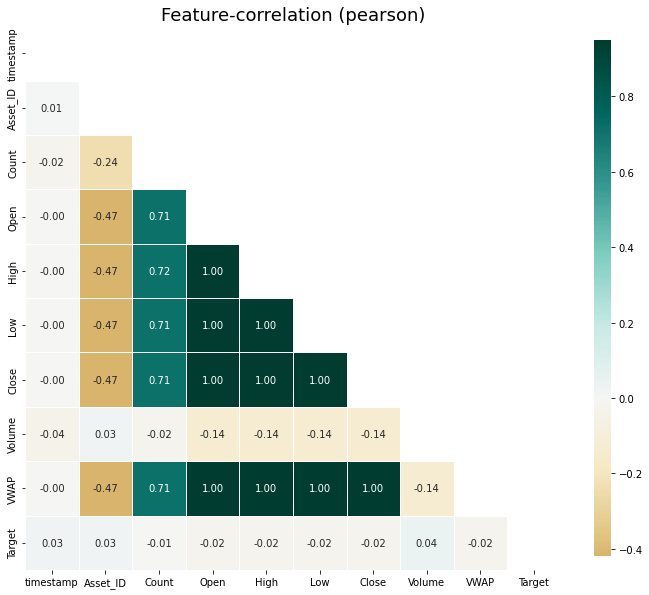

In [13]:
corr_plot(train[:10000])

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

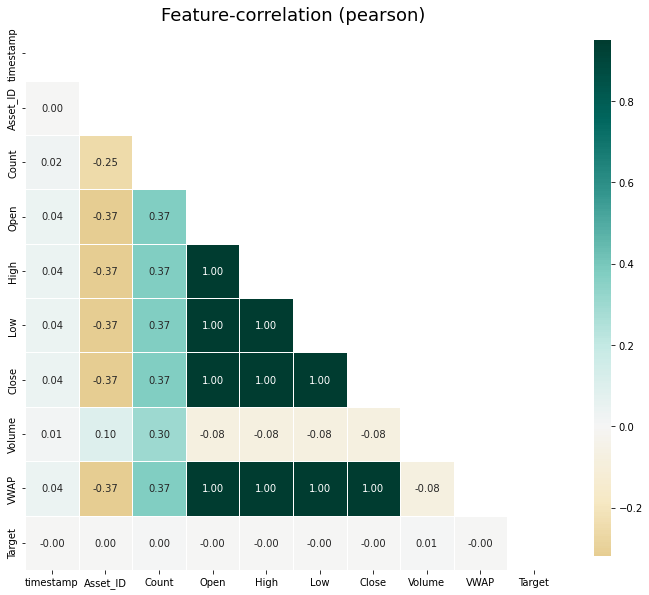

In [14]:
corr_plot(train_sup)

# Observation 3

We see that the features are less correlated with the target value in ```supplemental_train.csv``` also the features are less correlated with each other

# Outlier

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target'>

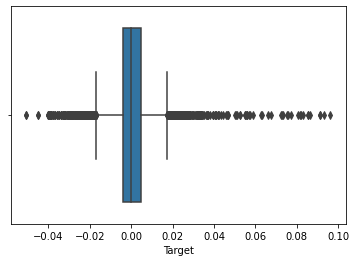

In [28]:
sns.boxplot(train['Target'][:10000])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target'>

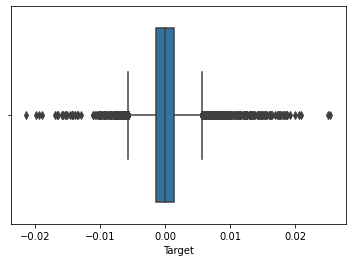

In [30]:
sns.boxplot(train_sup['Target'][:10000])

# Asset 

(array([3898901., 1953537., 1791867., 3112006., 1956200., 1951127.,
        3548101.,  670497., 1701261., 3653309.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

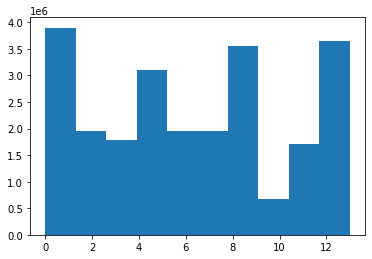

In [36]:
plt.hist(train['Asset_ID'])

(array([287919., 143998., 143998., 287996., 143998., 143998., 287715.,
        143543., 143956., 287991.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

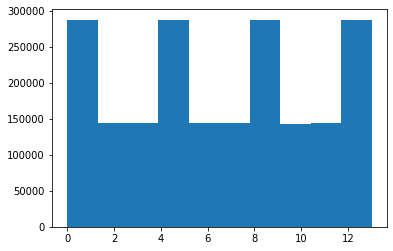

In [37]:
plt.hist(train_sup['Asset_ID'])

# Thank you
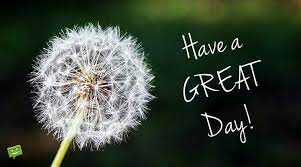